# Part-2

In [1]:
import numpy as np
import pandas as pd
import tweepy
import csv
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
consumer_key = ######################################
consumer_secret = ######################################
access_key = ######################################
access_secret = ######################################

In [3]:
def get_tweets(user_name):
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    alltweets = []
    
    new_tweets = api.user_timeline(screen_name = user_name, count=200)
    
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    
    
    while len(alltweets) <= 3200:
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = user_name,count=200,max_id=oldest,include_entities=True)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        outtweets = []
        a, b = "0", "0"
        for tweet in alltweets:
            a = "https://twitter.com/i/web/status/" + tweet.id_str
            outtweets.append([tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count, tweet.retweet_count, a])
        with open('%s_tweets.csv' % user_name, 'w') as f:
            writer = csv.writer(f)
            writer.writerow(["id","created_at","text", "favorite_count", "retweet_count", "extended_url"])
            writer.writerows(outtweets)
        
        pass
    return alltweets

In [4]:
INC_alltweets = get_tweets("INCIndia")

## A

In [5]:
count_media = 0
for INC_tweets in INC_alltweets:
    if 'media' in INC_tweets.entities:
        media=INC_tweets.entities['media']
        if media[0]['type'] == 'photo':
            count_media+=1
print("Tweets Containing Images:",count_media)

Tweets Containing Images: 370


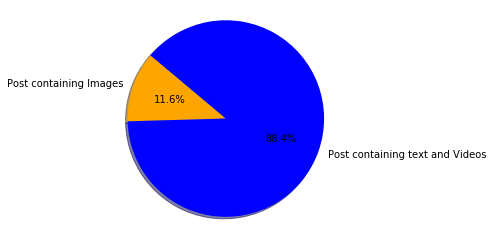

In [6]:
labels = "Post containing Images", "Post containing text and Videos"
sizes = [count_media, 3200-count_media]
colors = ['orange', 'blue']
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [7]:
with open("INCIndia_tweets.csv") as csvfile:
    readCSV = csv.reader(csvfile)
    tweets_INC = list(readCSV)
    tweets_INC = tweets_INC[1:]
    print(tweets_INC[0])

['1117364091822145536', '2019-04-14 09:48:53', "A moment of innocence &amp; love captured at Smt. @priyankagandhi's roadshow in Assam. \n\n#PriyankaGandhiInAssam https://t.co/cVDP0qPcvi", '4664', '967', 'https://twitter.com/i/web/status/1117364091822145536']


## b. WordCloud and Popularity

In [14]:
import heapq

popular_tweet_list = []
for i in range(3200):
    curr_popularity = (int)(tweets_INC[i][4])*3 + (int)(tweets_INC[i][3])
    popular_tweet_list.append(curr_popularity)

larg_1000 = heapq.nlargest(1000, popular_tweet_list)
indices_lis = [popular_tweet_list.index(elem) for elem in larg_1000]
# print(indices_lis)

print("Top 5 Most popular Tweets: ")
for i in range(5):
    print("Popularity Score: ", larg_1000[i], "Tweet: ", tweets_INC[indices_lis[i]][2])

Top 5 Most popular Tweets: 
Popularity Score:  62616 Tweet:  RT @RahulGandhi: Well done DRDO, extremely proud of your work. 

I would also like to wish the PM a very happy World Theatre Day.
Popularity Score:  61974 Tweet:  RT @capt_amarinder: Dear @narendramodi ji , I’m touring the border areas of Punjab &amp; I’m presently in Amritsar. Came to know that @pid_gov…
Popularity Score:  60693 Tweet:  RT @RahulGandhi: Youngsters, 

Want to start a new business? Want to create jobs for India? 
Here’s our plan for you:

1. ZERO permissions…
Popularity Score:  55434 Tweet:  RT @RahulGandhi: NO ONE KILLED...

Haren Pandya.

Tulsiram Prajapati.

Justice Loya.

Prakash Thombre. 

Shrikant Khandalkar.

Kauser Bi.…
Popularity Score:  54702 Tweet:  RT @RahulGandhi: It's done! 

Rajasthan, Madhya Pradesh &amp; Chhattisgarh have waived farm loans.

We asked for 10 days. 

We did it in 2.


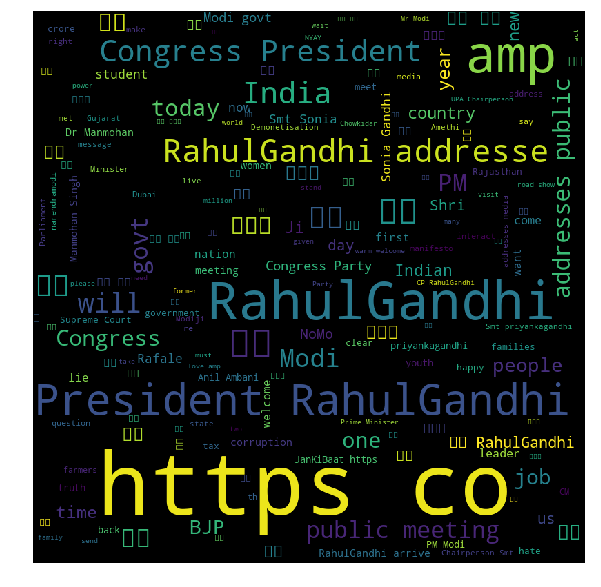

In [15]:
def generateWordClouds():
    comment_words = ' '
    stopwords = set(STOPWORDS)
    
    for i in range(1000):
        i = str(tweets_INC[indices_lis[i]][2])
        tokens = i.split()
        if len(tokens) == 0:
            continue
        else:
            tokens = tokens[1:]
            comment_words +=' '.join(tokens)
            
    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

generateWordClouds()

## 5 most used hashtags

In [10]:
INC_hashtags_dict = {}
for INC_tweet in INC_alltweets:
    INC_hashtags = INC_tweet.entities.get('hashtags')
    for INC_hashtag1 in INC_hashtags:
        if INC_hashtag1['text'] in INC_hashtags_dict.keys():
            INC_hashtags_dict[INC_hashtag1['text']] += 1
        else:
            INC_hashtags_dict[INC_hashtag1['text']] = 1

In [11]:
print(INC_hashtags_dict)

{'PriyankaGandhiInAssam': 1, 'RamNavami': 2, 'HappyBaisakhi': 1, 'TamilNewYear': 1, 'NYAYforKarnataka': 2, 'RafaleChorChowkidar': 2, 'KarnatakaWithMaithri': 1, 'JallianwalaBagh': 1, 'NammaThalaivarRahulGandhi': 4, 'SoniaGandhiRaeBareli': 3, 'JanSankalpRally': 6, 'BengalWithRahulGandhi': 1, 'RafaleDeal': 2, 'ChowkidarChorHai': 14, 'AmethiKaRahulGandhi': 1, 'DemonetisationScam': 1, 'Scared2Debate': 2, 'BJPJumlaManifesto': 12, 'AbHogaNYAY': 7, 'AcrosstheAisle': 1, 'InConversationWith': 12, 'HumaroRahulGandhi': 2, 'PeoplesAgenda2019': 2, 'GudiPadwa': 1, 'Navratri': 1, 'नवरात्रि': 1, 'नववर्ष': 1, 'HappyUgadi': 1, 'AmchaRahulGandhi': 2, 'RahulGandhiStudentsInteraction': 1, 'RafaleScam': 24, 'RahulGandhiWayanad': 1, 'RahulTharangam': 1, 'CashForVotesModi': 1, 'HumNibhayenge': 1, 'AssamWelcomesRahulGandhi': 1, 'NagalandWelcomesRahulGandhi': 1, 'CongressManifesto2019': 6, 'ModiMatBanao': 3, 'TelanganaProgressWithCongress': 4, 'GabbarSinghTax': 5, 'MaithriForKarnataka': 1, 'EkHiChowkidarChorHai'

In [13]:
reverse_sorted_dict = sorted(INC_hashtags_dict, key=INC_hashtags_dict.get, reverse=True)
print(reverse_sorted_dict[0:5])
for i in range(5):
    print(INC_hashtags_dict[reverse_sorted_dict[i]])

['RafaleScam', 'JanKiBaat', 'OneNationBillionIdeas', 'ChowkidarChorHai', 'LoveNotHate']
24
23
22
14
14
